In [28]:
%run Packages.py
%matplotlib inline

### Introduction

This project is about analyzing crimes and house prices in Chicago. Based on the different house prices of different neighborhoods and the crime occurrence in those areas, our goal is to determine whether there is correlation between the crime rates and house prices in different neighborhoods. We have analyzed chicago crime data and median sale price of houses of different neighborhoods in Chicago. We have calculated the correlations between change in house prices and number of crimes in different neighborhoods from 2012-2018 and we came to a conclusion on whether or not there is a connection between them based on available data. Furthurmore, we have predicted house prices and number of crimes for two more years and shown that the predicted data also supports our conclusion. 

In [ ]:
CrimeFile = 'D:/CS 418/Project/Merged/0To2043066.csv'
CrimeDF = pd.read_csv(CrimeFile, keep_default_na=False)
housedata = pd.read_csv("neighborActualFiltered.csv", usecols=range(1,5), keep_default_na=False)
housedata=housedata[housedata['Median Ppsf']!='']
housedata.head()
HousePriceDF=housedata.copy()

### Data Cleaning

We have used two different datasets for this project:
1. Chicago crime data from city of chicago website: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data
2. Chicago house prices data from redfin: https://www.redfin.com/blog/data-center

Since we have house price of chicago neighborhood from 2012-2018, we got rid of all the crimes which occurred before 2012 and after 2018. We also got rid of the rows with null values. There is no separate script for cleaning the crime data. Data before 2012 and after 2018 was filtered out when we downloaded the dataset. For removing rows with null values, we checked for null values before every operations. We ignored the rows which have a null value. 
After getting the house price data, we removed those column where there was no value available. We also planned to work with price per square feet value. So we keep Price per square and sale price and filtered out the rest. Each neighborhood name had unnecessary part. We removed that part, too.

In [30]:
HousePriceDF = removingJunk(HousePriceDF)
CrimeDF = CrimeDF[CrimeDF['Neighborhood'] != '']
CrimeDF = CrimeDF[CrimeDF['Year'] != 2011]
CrimeDF = CrimeDF[CrimeDF['Year'] != 2019]

### Exploratory Data Analysis

In our project we are using two datasets: Chicago Crime Data and House Prices Data.

#### Chicago Crime Data: 
This dataset contains the criminal offences occurred in Chicago from 2001-2019. However, we are going to use crime data in 2012-2019 which comprises of more than 2 million records. Each record in this dataset represents the details of a crime that happened in Chicago. The details include the time, type, description, location etc. of the crime. However, we are only going to use time and location of every crime. In this dataset, the neighborhood or the zipcode of the location of the crime is not given. Since, our goal is to analyze the crime happening in Chicago based on different areas and their relationship with the economy of those areas, we had to extract the neighborhoods from the location given in coordinates. We used the ArcGIS API to extract the neighborhoods

#### House Prices Data from Redfin: 
Redfin provides the data of home sale prices from 2012-2019. Each record represents a 90-day period. Each row includes median sale price, median price per square foot, median listed price, number of houses sold within that 90-day period in a particular neighborhood. We are going to relate our 2 datasets using their neighborhood.

Some of the rows from out data sets are shown below:

In [4]:
CrimeDF[['Year','Primary Type','X Coordinate', 'Y Coordinate','Neighborhood']].head()

,Year,Primary Type,X Coordinate,Y Coordinate,Neighborhood
0,2015,BATTERY,1144606.0,1903566.0,Austin
1,2015,OTHER OFFENSE,1166468.0,1860715.0,West Englewood
2,2015,BATTERY,1185075.0,1875622.0,Kenwood
3,2015,BATTERY,1178033.0,1870804.0,Washington Park
4,2015,ROBBERY,1144920.0,1898709.0,Austin


In [5]:
HousePriceDF.head()

,Region,Period Begin,Median Ppsf,Median Sale Price
0,Albany Park,11/1/2011,78.4,$154K
1,Albany Park,12/1/2011,76.8,$122K
2,Albany Park,1/1/2012,77.92991453,$129K
3,Albany Park,2/1/2012,80.89870409,$131K
4,Albany Park,3/1/2012,98.3973108,$141K


### Data Transformation
To perform our experiments, we had to make a few transfomations to our data. We had to aggregate the crime data based on the count of crimes in each year in each neighborhood and calculated their ratio. The following function both of these things and writes them into csv files.

In [6]:
CreateCrimeRatioTable(CrimeDF,'CrimeRatioTable.csv','CrimeCountTable.csv')

After aggregating the data based on the count of crimes in each neighborhood by year, the crime data looks as follows:

In [7]:
CrimeCountTable = pd.read_csv('CrimeCountTable.csv',usecols=range(1,9))

,Neighborhood,2012,2013,2014,2015,2016,2017,2018
0,Albany Park,2956,2708,2404,2481,2383,2456,2415
1,Andersonville,517,466,382,419,407,500,527
2,Archer Heights,1251,1299,1076,1000,893,864,855
3,Armour Square,787,649,568,544,510,529,492
4,Ashburn,2110,2143,2033,1690,1883,1874,1802


Let us see how the number of crimes differ in each neighborhood in year 2012:

<img src="ChicagoCrimesByNeghborhood2012.png" />

Crime ratio for each year was calculated with this formula: 
Ratio = (value for a neighborhood)/(sum of value for all neighborhoods). After calculating the crime ratio our data looks like the following:


In [34]:
CrimeRatioTable = pd.read_csv('CrimeRatioTable.csv',usecols=range(1,9))
CrimeRatioTable.head(3)

,Neighborhood,2012,2013,2014,2015,2016,2017,2018
0,Albany Park,0.008974,0.009013,0.008961,0.009896,0.009255,0.009439,0.009327
1,Andersonville,0.001570,0.001551,0.001424,0.001671,0.001581,0.001922,0.002035
2,Archer Heights,0.003798,0.004324,0.004011,0.003989,0.003468,0.003321,0.003302


Similarly, house price data was aggregated by each year and neighborhood and the ratio of house prices for each neighborhood was calculated by year:

In [33]:
HousePriceAggregated = makingAggTable(HousePriceDF)
HousePriceRatio = makeRatio(HousePriceAggregated,7)
HousePriceRatio.head(3)

,Region,2012,2013,2014,2015,2016,2017,2018
0,Albany Park,0.004336,0.004805,0.005217,0.005721,0.005535,0.005642,0.005392
1,Andersonville,0.008589,0.008562,0.008265,0.008228,0.008141,0.007830,0.007615
2,Arcadia Terrace,0.003546,0.005027,0.005069,0.004614,0.004831,0.004670,0.005072


#### Road to Hypothesis
We plotted the house price(ratio) and crime price(ratio) trends. Around 75% are inverse to each other.

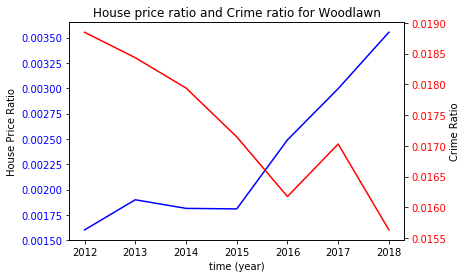

In [26]:
plotTogether('Woodlawn',CrimeRatioTable,HousePriceRatio)

### Hypothesis:
From EDA, we hypothesize that there is an inverse relationship between change in house price ratio and change in crime ratio. In other words, we want to show that there is a strong negative correlation between house price ratio and crime ratio. 

### Correlations:
We calculated the pearson correlation coefficient between house price ratio and crime ratio for each neighborhood and plotted them in a graph. It was observed that 77.33% had a negative correlation between crime ratio and house price ratio and 22.67% neighborhoods showed a positive correlation

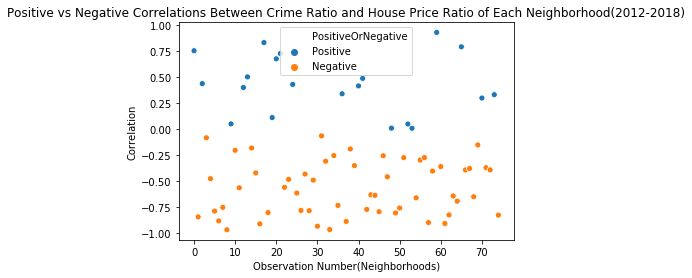

In [32]:
FindCorrelation(CrimeRatioTable, HousePriceRatio,'Correlation_ratio.csv')
Correlations = pd.read_csv('Correlation_ratio.csv', usecols=range(1,5))
PlotCorrelation(Correlations,'PositiveOrNegative','Positive vs Negative Correlations Between Crime Ratio and House Price Ratio of Each Neighborhood(2012-2018)')

### ML Analysis
Given that we only had data for only 7 years, we wanted to check if the correlations were projected to change for future data. Linear regression was used to predict number of crimes and household prices in the neighbourhood for 2 more years(2019,2020). After prediction, the ratios for those years were calculated.

In [ ]:
neighborhoods = CrimeDF['Neighborhood'].unique()
groupedByNeighbourhood = CrimeDF.groupby('Neighborhood')
pred = predictForAllNeighborhood(groupedByNeighbourhood,neighborhoods)

In [15]:
FindRatio(pred,CrimeRatioTable,'CrimeRatioWithPredicted.csv')

In [16]:
CrimeRatioWithPredicted = pd.read_csv('CrimeRatioWithPredicted.csv',usecols=range(1,11))

In [17]:
HousePriceWithPredicted = housePred(HousePriceDF,HousePriceAggregated)

In [18]:
HousePriceWithPredictedRatio=makeRatio(HousePriceWithPredicted, 9)

Now, if recalculate the correlations and plot those, we will still see that there is a higher percentage of negative correlations than that of negative correlations: negative 53.33%, positive 47.67%

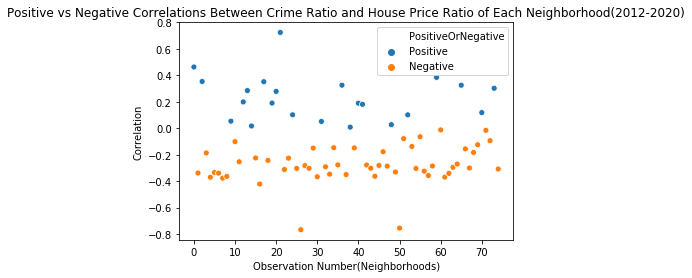

In [31]:
FindCorrelation(CrimeRatioWithPredicted, HousePriceWithPredictedRatio,'Correlation_ratio_with_predicted.csv')
CorrelationsWithPredicted = pd.read_csv('Correlation_ratio_with_predicted.csv', usecols=range(1,5))
PlotCorrelation(CorrelationsWithPredicted,'PositiveOrNegative','Positive vs Negative Correlations Between Crime Ratio and House Price Ratio of Each Neighborhood(2012-2020)')

### Significance of Correlations:
In both plots, we see that majority of correlations are negative. But it is not enough to come to the conclusion that there is an inverse relationship between house prices and number of crimes in different neighborhoods. Because we do not know whether those correlations are significant or not. To determine the significance of the correlations we perform a hypothesis test with following setup:
##### Null Hypothesis: 
The population correlation coefficient is not significantly different from zero. There is not a significant linear relationship(correlation) between xx and yy in the population.
##### Alternative Hypothesis: 
The population correlation coefficient IS significantly different from zero. There is a significant linear relationship (correlation) between xx and yy in the population.
Then, we perform a t-test using p-value with a significance level of 0.1.
Let us see how many correlations are significant in data from 2012-2018.

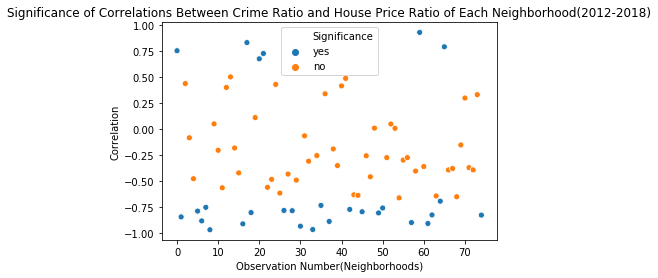

In [21]:
PlotCorrelation(Correlations,'Significance','Significance of Correlations Between Crime Ratio and House Price Ratio of Each Neighborhood(2012-2018)')

As we can see, only 33.33% correlations are significant. Let us see how many are significant when we inlcude predicted data.

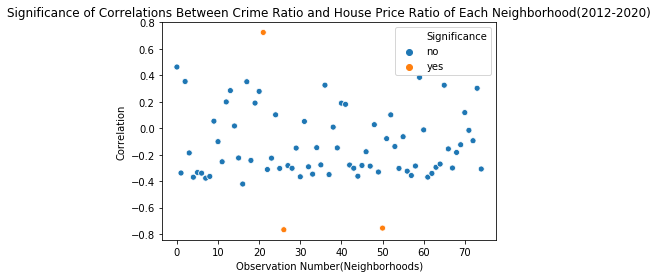

In [22]:
PlotCorrelation(CorrelationsWithPredicted,'Significance','Significance of Correlations Between Crime Ratio and House Price Ratio of Each Neighborhood(2012-2020)')

Percentage of significant correlations are pretty low in this case as well.

### Results:
Although, most neighborhoods have a negative correlation between number of crimes and house price, those correlations are not significant.

Therefore, we do not have enough evidence to claim that there is an inverse relationship between number of crimes and house price in a neighbourhood.

### Limitations

1. Population data was not found - crime rate could not be calculated.
2. Neighborhoods do not match in the datasets. Therefore, only the common ones were kept.
3. Data for only 2012-2018 was available in both datasets. If we had data for more years, better insights could have been found.
